<h1 style="color:#1E90FF; font-weight:bold;">BTS</h1>
<h2 style="color:#1E90FF; font-weight:bold;">MBDS - Big Data & AI</h2>
<h3 style="color:#1E90FF; font-weight:bold;">DSF - Assignment 2 - Ex 3: Group By Drinking Game</h3>
<h4 style="color:#1E90FF; font-weight:bold;">Pablo Ruiz Lopez</h4>

In [42]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic commands for visualization
%matplotlib inline

### Assignment Tasks

#### 1. Dataset Import (10 points)
- Import the `drinks.csv` dataset. This file can be found in the Day 2 module on Canvas.

In [43]:
# Loading the data
drinks_df = pd.read_csv('drinks.csv')

##### Basic Data Exploration

In [44]:
drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [45]:
display(drinks_df.head())

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [46]:
# Exploring 'continent' column since it is the only one with null values
display(drinks_df['continent'].unique())

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

**Interesting observations** 

The dataset seems to lack a specific value or category for the American continent. Additionally, could `SA` possibly represent South America? We should delve deeper into this

In [47]:
# Checking rows with missing values
display(drinks_df[drinks_df.isna().any(axis=1)][['country', 'continent']])

,country,continent
5,Antigua & Barbuda,NaN
11,Bahamas,NaN
14,Barbados,NaN
17,Belize,NaN
32,Canada,NaN
41,Costa Rica,NaN
43,Cuba,NaN
50,Dominica,NaN
51,Dominican Republic,NaN
54,El Salvador,NaN


Intriguingly, all records lacking the `continent` value belong to North or Central America. Could this be the missing link? Let's delve deeper. Where might the South American continents be?

In [48]:
# Checking for records with 'SA' as continet values
display(drinks_df[drinks_df['continent'] == 'SA'][['country', 'continent']])

,country,continent
6,Argentina,SA
20,Bolivia,SA
23,Brazil,SA
35,Chile,SA
37,Colombia,SA
52,Ecuador,SA
72,Guyana,SA
132,Paraguay,SA
133,Peru,SA
163,Suriname,SA


Here they are! 

**Data Imputing**

Based on our earlier observations, we can infer that countries labeled as `SA` or having a `nan` value under continent belong to the American continent. Consequently, we can assign the 'AM' label to all such entries.

In [49]:
# Replacing 'SA' and nan values with 'AM'
drinks_df['continent'].replace({'SA': 'AM', np.nan: 'AM'}, inplace=True)

##### Sanity Checks

In [50]:
# Evaluating for 193 non-null values in 'continent'
drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [51]:
# Evaluating for unique values in 'continent' column
display(drinks_df['continent'].unique())

array(['AS', 'EU', 'AF', 'AM', 'OC'], dtype=object)

In [52]:
# Evaluating the list of contries categorized as 'AM'
display(drinks_df[drinks_df['continent'] == 'AM'][['country', 'continent']])

,country,continent
5,Antigua & Barbuda,AM
6,Argentina,AM
11,Bahamas,AM
14,Barbados,AM
17,Belize,AM
20,Bolivia,AM
23,Brazil,AM
32,Canada,AM
35,Chile,AM
37,Colombia,AM


#### 2. Beer Servings by Continent (5 points)
- Display a bar plot that showcases the average beer servings by continent. Make sure the continents are ranked from highest to lowest average servings.

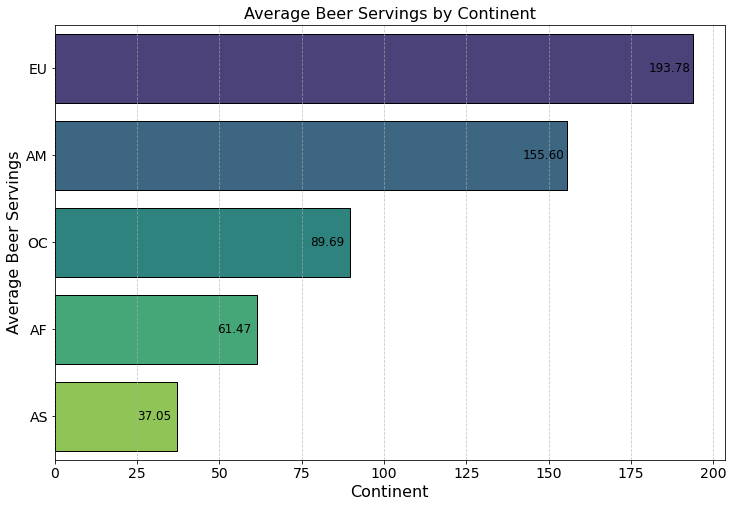

In [53]:
# Calculating average beer servings by continent
avg_beer_servings = drinks_df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)

# Plotting the results
# Parameters and settings are optimized for appealing colors, readability and distinction
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=avg_beer_servings.values, 
            y=avg_beer_servings.index, 
            palette='viridis',
            orient='h',
            edgecolor='black')

# Annotations of values at the top of each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width - 7, # Annotations to the left of the value
             p.get_y() + p.get_height() / 2,
             '{:1.2f}'.format(width), 
             ha="center",  
             va="center",  
             fontsize=12, 
             color='black')

# Plot titles, grid and axis text
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Average Beer Servings by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=16)
plt.ylabel('Average Beer Servings', fontsize=16)

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


#### 3. Outlier Detection (10 points)
- Use the Interquartile Range (IQR) method to identify countries that might be considered outliers for `spirit_servings`.
  - **Hint**: Calculate the quartiles directly and use them to filter the countries using the given formula. It should take no more than two lines of code.

The Interquartile Range (IQR) is calculated using the formula:

$$
\text{IQR} = Q3 - Q1
$$

where:
- \(Q1\) is the first quartile, representing the 25th percentile of the data.
- \(Q3\) is the third quartile, representing the 75th percentile of the data.


In [54]:
# Computing Q1 (25%), Q3 (75%), and IQR (Q3 - Q1)
Q1 = drinks_df['spirit_servings'].quantile(0.25)
Q3 = drinks_df['spirit_servings'].quantile(0.75)
IQR = Q3 - Q1 

# Defining bounds
lower_b = Q1 - 1.5 * IQR
upper_b = Q3 + 1.5 * IQR

# Outliers
outliers = drinks_df[(drinks_df['spirit_servings'] < lower_b) | 
                     (drinks_df['spirit_servings'] > upper_b)] \
                     [['country', 'spirit_servings']]

display(outliers)

,country,spirit_servings
15,Belarus,373
68,Grenada,438
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315


For the purpose of completion, let's just corroborate this in a visual way.

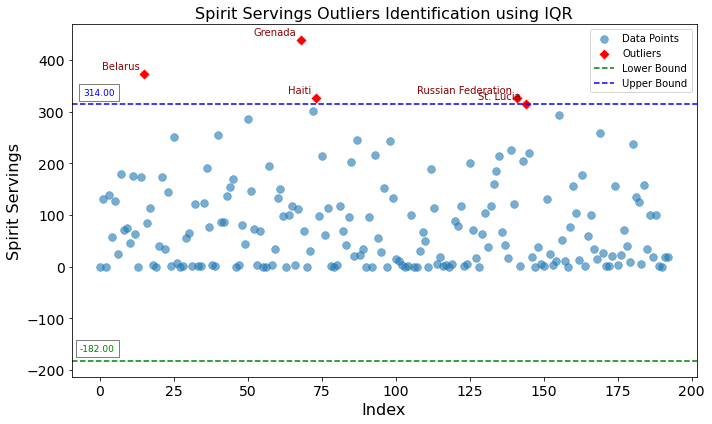

In [55]:
# One same figure for a scatter plot for detecting outliers in 'spirit_servings'
plt.figure(figsize=(10, 6))

# Overlapping 'spirit_servings' scatter plot data with outliers scatter plot data
sns.scatterplot(x=drinks_df.index, y=drinks_df['spirit_servings'], 
                label='Data Points', 
                s=60,
                alpha=0.6,
                edgecolor=None)

sns.scatterplot(x=outliers.index, y=outliers['spirit_servings'], 
                color='red', 
                label='Outliers', 
                s=60,
                marker='D')


# Drawing a horizontal line to depict the upper and lower bounds, adding an annotation
plt.axhline(y=lower_b, 
            color='g', 
            linestyle='--', 
            label=f'Lower Bound')

plt.axhline(y=upper_b, 
            color='b', 
            linestyle='--', 
            label=f'Upper Bound')


# Annotating IQR values on the plot in boxes on top of the lines
plt.text(5, lower_b + 15, 
         f'{lower_b:.2f}', 
         fontsize=9, 
         verticalalignment='bottom', 
         horizontalalignment='right', 
         color='g', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.text(5, upper_b + 15, 
         f'{upper_b:.2f}', 
         fontsize=9, 
         verticalalignment='bottom', 
         horizontalalignment='right', 
         color='b', 
         bbox=dict(facecolor='white', alpha=0.5))


# Annotating the outlier points with country names
for i in outliers.index:
    plt.annotate(drinks_df.loc[i, 'country'], (i, outliers.loc[i, 'spirit_servings']), 
                 textcoords="offset points", 
                 xytext=(-5,5), 
                 ha='right', 
                 fontsize=10, 
                 color='darkred')


# Plot titles and axis text
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plot titles and axis text
plt.title('Spirit Servings Outliers Identification using IQR', fontsize=16)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Spirit Servings', fontsize=16)

# Tight layout for visual output, legends and display
plt.legend()
plt.tight_layout()
plt.show()

#### 4. Beverage Popularity Pie Chart (15 points)
- Create a pie chart that depicts the percentage of countries where Beer, Wine, or Spirits are the most consumed alcoholic beverages. To achieve this:

  - Add a new column to the dataframe indicating whether Beer, Wine, or Spirits have the highest value for each country.

  - Consider using the `apply` function. It might be beneficial to create a distinct function, as working directly with a lambda function might get complicated. The `axis` parameter in the `apply` function may be necessary.

  - Once you have added this new column, you can easily tally the values and create the pie chart.
  
  - Alternatively, you might want to explore the `numpy select` function.


**Computing the Preference Counts series for latter plotting**

In [56]:
# Defining conditions
conditions = [
    (drinks_df['beer_servings'] > drinks_df['spirit_servings']) & (drinks_df['beer_servings'] > drinks_df['wine_servings']),
    (drinks_df['spirit_servings'] > drinks_df['beer_servings']) & (drinks_df['spirit_servings'] > drinks_df['wine_servings']),
    (drinks_df['wine_servings'] > drinks_df['beer_servings']) & (drinks_df['wine_servings'] > drinks_df['spirit_servings'])]

# Corresponding categories to be assigned if conditions are met
choices = ['Beer', 'Spirits', 'Wine']

# Assigning category to each country based on the conditions and choices defined
drinks_df['most_consumed'] = np.select(conditions, choices, default='No Preference')

# Counting the occurrences of each type of most consumed 
preference_series = drinks_df['most_consumed'].value_counts()

display(preference_series)

Beer             101
Spirits           59
Wine              20
No Preference     13
Name: most_consumed, dtype: int64

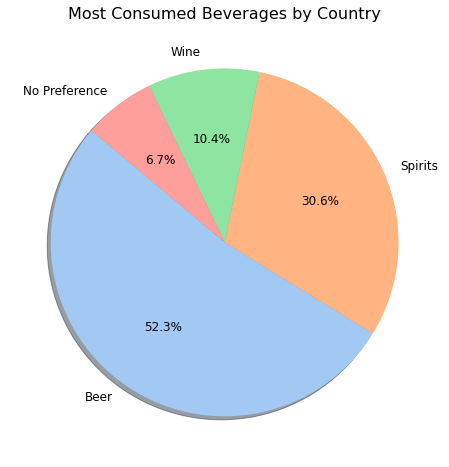

In [57]:
# Pie chart figure definitions
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")

# Creating custom labels for displaying the names in the pie chart
labels_percents = ['{0}'.format(i) for i in preference_series.index]

# Pie chart settings
plt.pie(preference_series, 
        labels=labels_percents, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        shadow=True,
        textprops={'fontsize': 12})

# Pie chart title text
plt.title('Most Consumed Beverages by Country', fontsize=16)

# Show plot
plt.show()